In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Курс Дата аналітик /Data/yulu_rental.csv')

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів



**Питання №1**

Чи впливає швидкість вітру (windspeed) на кількість велосипедів, взятих в оренду (count)?
Чи є залежність в цих даних?

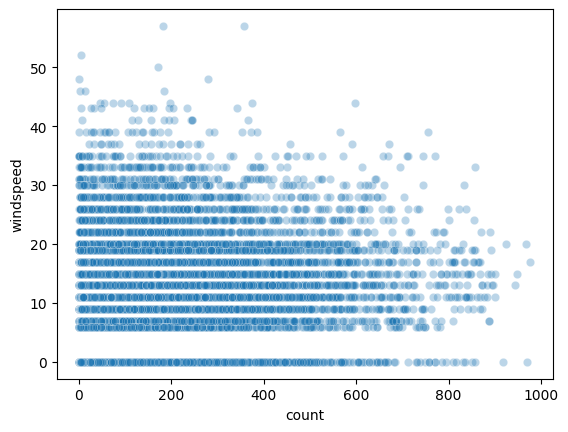

In [7]:
df['windspeed'] = df['windspeed'].round() #округлюю швидкість вітру
sns.scatterplot(df, x = 'count', y = 'windspeed', alpha = 0.3);

**Висновок:**

З графіку ми бачимо, що при меншому вітрі у нас більше використовують велосипеди.

Виглядає так, що швидкість вітру негативно впливає на користування послугою.

Можна відстежувати прогноз на погодні умови та перевозити велосипеди в різні райони, щоб при тривалих змінах швидкості вітру велосипеди не просто стояли, а могли приносити кошти в іншому районі.

Додатково можна дослідити ситуацію в кожен з сезонів. Та в окремі години доби.


**Питання №2**

Чи впливає влітку температура на користування послугою?

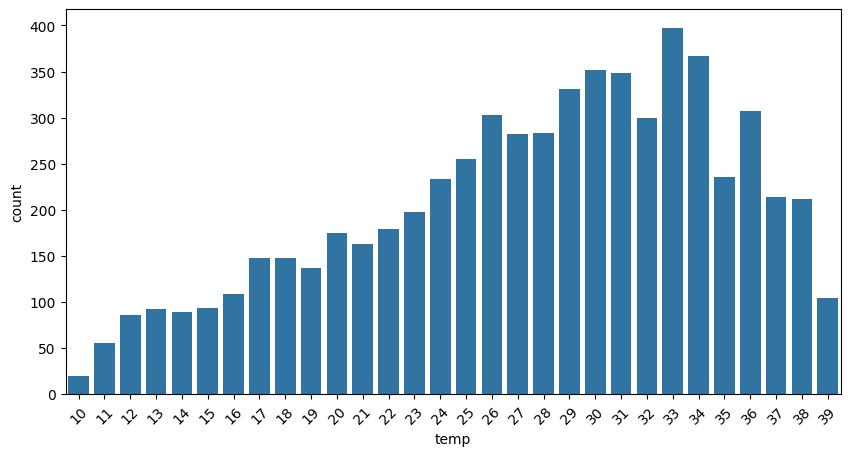

In [10]:
plt.figure(figsize = (10, 5))
df_summer = df[df['season'] == 2]
df['temp'] = df['temp'].round().astype(int)
plt.xticks(rotation = 45)
sns.barplot(df_summer, x = 'temp', y = 'count', errorbar = None);

**Висновок:**

З графіку ми бачимо, що дійсно температура впливає на використання велосипедів влітку.
Піки користувачів ми бачимо в 33-34 градуси, напевно користувачам хочеться вітерця, тому беруть велосипеди і їдуть :)

У 37-38 бачимо спад в два рази.

У 39 градусів, ми бачимо великий спад користувачів, напевно бо крутити педалі у таку спеку дуже важко фізично.

Цікаво було б дослідити ці пікові та критично низькі значення у різне значення вітру. Чи є також залежність з цими показниками.

На основі цієї аналітики ми так само можемо робити прогнози по завантаженню користування велосипедами в залежності від прогнозу погоди. Та робити маркетингові або технічні покращення в ці дні.



**Питання №3**

Як в залежності від температури в різні сезони змінюється кількість незареєстрованих користувачів?

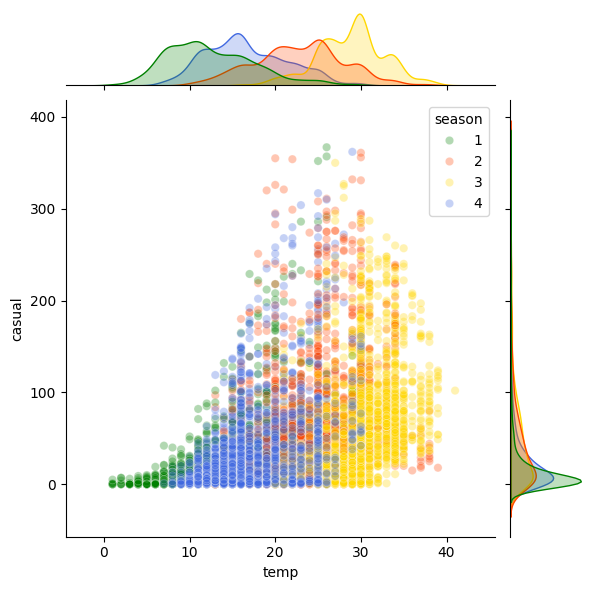

In [9]:
collor = {1: 'green', 2: 'orangered', 3: 'gold', 4: 'royalblue'}
sns.jointplot(data = df, x = 'temp', y = 'casual', hue = 'season', alpha = 0.3, palette = collor);

#(1: весна, 2: літо, 3: осінь, 4: зима)

**Висновки:**

З графіку ми бачимо, що найбільше незареєстрованих користувачів осінню. Це може бути повʼязано з початком навчання в школах та університетах. В цей проміжок часу потрібно зробити різні маркетингові стратегії, щоб ці користувачі стали постійними клієнтами.

Весною та влітку особливо не відрізняється кількість незареєстрованих користувачів, проте вона дуже схожа.

Крива зверху нам показує розподіл температур. Тут ми бачимо, що найчастіше зустрічається температура в діапазоні від 15 до 30 градусів.

Крива праворуч вказує нам на кількість незареєстрованих користувачів. Найбільше їх в діапазоні від 0 до 100.
Бачимо з графіку що незареєстровані користувачі є завжди.

Зі збільшенням температур -зростає і кількість користувачів, які поки незареєстровані.

